## Analyze A/B Test Results

By Abdelrahman Hossam

In [215]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [265]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

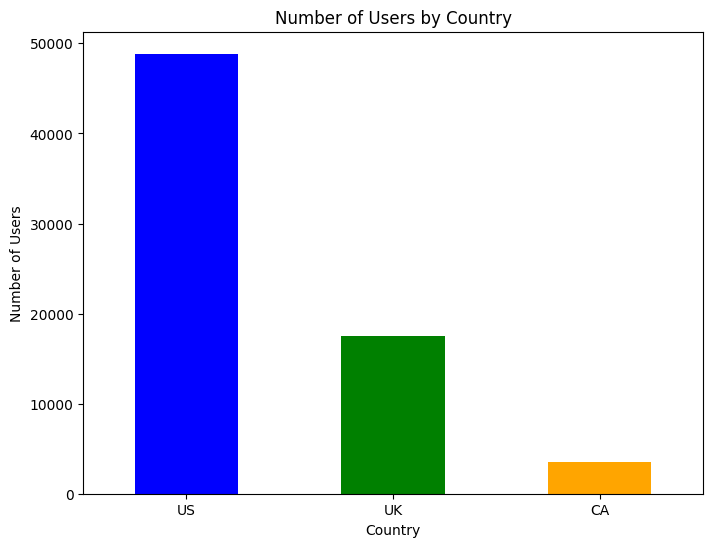

In [266]:
import matplotlib.pyplot as plt

# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
country_counts.plot(kind='bar', color=['blue', 'green', 'orange'])  # You can customize colors
plt.title('Number of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [218]:
df.converted.mean() * 100

np.float64(13.047832992316389)

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [219]:
df.isna().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

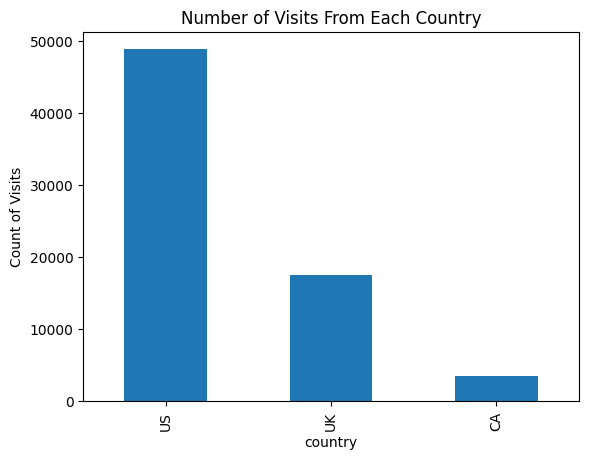

In [220]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

converted 

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

Values are 1 , 0 Yes it makes sense since the custemer either converted or did not convert there is no other possibility 

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [ ]:
df.converted.mean()

np.float64(0.13047832992316388)

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [222]:
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [223]:
df.query('group == "treatment"')['converted'].mean()

np.float64(0.15532078043793132)

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In this sample treatment performed better by 5%

`e)` What is the probability that an individual was in the `treatment`?

In [224]:
len(df.query('group == "treatment"')) / len(df)

0.5038131894861853

about 50% chance

`f)` What is the probability that an individual was from Canada `CA`?

In [225]:
len(df.query('country == "CA"')) / len(df)

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [226]:
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [227]:
df.query('country == "UK"')['converted'].mean()

np.float64(0.12512107572218106)

In [228]:
df.query('country == "CA"')['converted'].mean()

np.float64(0.1252866972477064)

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

YES in this sample CA and UK have higher conversion rate than US

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [229]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [230]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.16%          |  9.4%          |
| Treatment   | 15.8%       |  14.86%          | 15.4 %          |

In [231]:
df.groupby(['country', 'group'])['converted'].mean()*100


country  group    
CA       control       9.447415
         treatment    15.401662
UK       control      10.164866
         treatment    14.869804
US       control      10.731405
         treatment    15.776876
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [232]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [233]:
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [234]:
control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [235]:
mean_converted = sum(treatment_converted) / len(treatment_converted)
mean_converted

0.1295617846695635

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [236]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted_500 = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()
    control_converted_500 = np.random.binomial(1, p_control_treatment_null, n_control).tolist()
    # calculate p_treatment and p_control under the null
    p_treatment_null = sum(treatment_converted_500) / len(treatment_converted_500)
    p_control_null = sum(control_converted_500) / len(control_converted_500)
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment_null - p_control_null
    # add p_diff to the p_diffs array  
    p_diffs.append(p_diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Yes it's a normal distribution with mean about 0 which match the 500 iterations that we did since we assumed that there is no diffrence in the conversion rate between the control and treatment 

<Axes: >

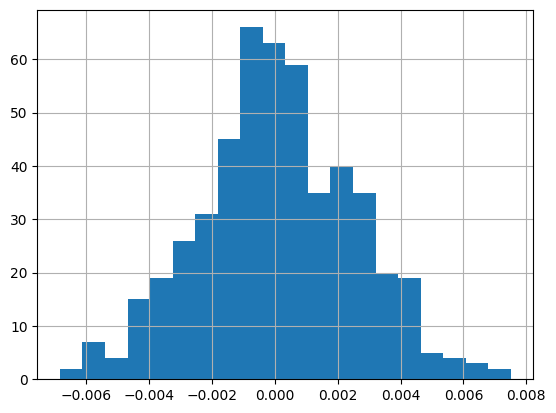

In [237]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [269]:
observed_diff_indf = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
proportion_greater = (p_diffs > observed_diff_indf).mean()
print(f"observed_diff_indf: {observed_diff_indf:.4f}, proportion_greater: {proportion_greater:.3f}")

observed_diff_indf: 0.0501, proportion_greater: 0.000


bonus


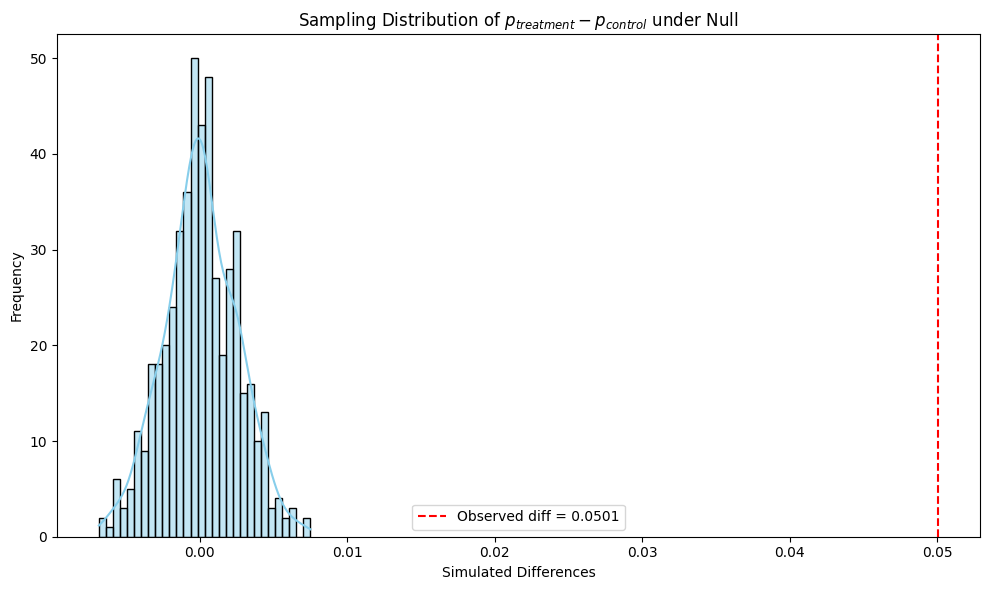

In [239]:
p_diffs = np.array(p_diffs)

plt.figure(figsize=(10, 6))
sns.histplot(p_diffs, kde=True, bins=30, color='skyblue', edgecolor='black')

plt.axvline(observed_diff_indf, color='red', linestyle='--', label=f'Observed diff = {observed_diff_indf:.4f}')

plt.title('Sampling Distribution of $p_{treatment} - p_{control}$ under Null')
plt.xlabel('Simulated Differences')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [240]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(
    df.query('group == "treatment"')['converted'],
    df.query('group == "control"')['converted']
)

print("t-statistic:", t_stat)
print(f"p-value: {p_value:.3f}")


t-statistic: 19.701444676269233
p-value: 0.000


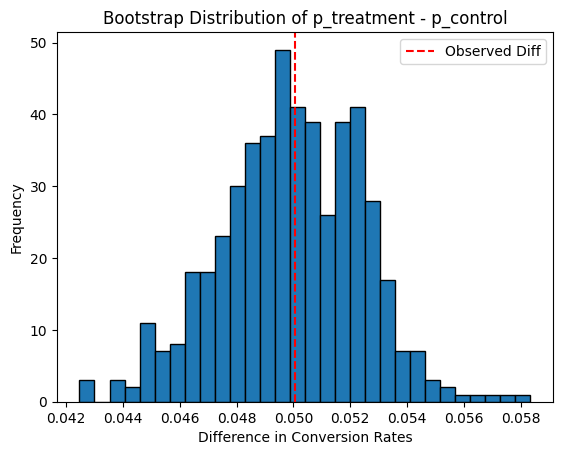

In [241]:
p_diffs_bootstrap = []

for _ in range(500):
    sample_df = df.sample(n=df.shape[0], replace=True)
    
    p_treatment = sample_df.query("group == 'treatment'")['converted'].mean()
    p_control = sample_df.query("group == 'control'")['converted'].mean()
    
    p_diffs_bootstrap.append(p_treatment - p_control)

p_diffs_bootstrap = np.array(p_diffs_bootstrap)
plt.hist(p_diffs_bootstrap, bins=30, edgecolor='black')
plt.axvline(x=observed_diff_indf, color='red', linestyle='--', label='Observed Diff')
plt.title("Bootstrap Distribution of p_treatment - p_control")
plt.xlabel("Difference in Conversion Rates")
plt.ylabel("Frequency")
plt.legend()
plt.show()


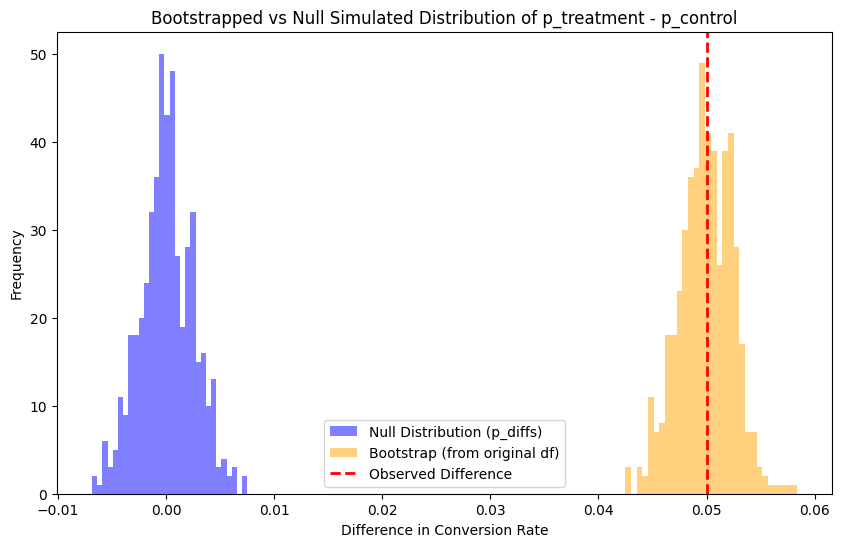

In [242]:
plt.figure(figsize=(10, 6))
plt.hist(p_diffs, bins=30, alpha=0.5, label='Null Distribution (p_diffs)', color='blue')
plt.hist(p_diffs_bootstrap, bins=30, alpha=0.5, label='Bootstrap (from original df)', color='orange')

observed_diff_indf = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
plt.axvline(observed_diff_indf, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')

plt.title('Bootstrapped vs Null Simulated Distribution of p_treatment - p_control')
plt.xlabel('Difference in Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

First we calculated the diffrence in the real samples we have5% diff, we wanted to compare that to the assumption we made earlier that there is no diffrence between the two samples , we then calculated the probability that  the real diffrence (observed_diff_indf) would pass the null assumption (p_diffs){we calculated the probability of observing a difference as extreme as the one we observed, assuming the null hypothesis is true} we found that this is very close to 0 since we have stated p_value of 0.05 that means we reject the null and accept the alternative that the treatment performed significantly better that the original (control)

we can confirm our work by doing a ttest I used ind since they are both samples and we found similar result , also by plotting the real diffrence and the data we simulated acorrding to null the line is greately away from it , doing the same for bootstrabing, we can get some intuition on our work 

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression


The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [243]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


In [244]:
df['ab_page'] = df['ab_page'].astype(int)

`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [245]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
 3   intercept  69889 non-null  int64 
 4   ab_page    69889 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB


the ab_page is bool , it should be changed to int

In [247]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [248]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                0.007175
Time:                        12:01:02   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

Yes having a pvalue of 0.000 means that the page affects the result significally

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [249]:
### Create the necessary dummy variables
df = pd.get_dummies(df, columns=['country'], drop_first=True)
df['country_UK'] = df['country_UK'].astype(int)
df['country_US'] = df['country_US'].astype(int)
df.head()

,group,converted,intercept,ab_page,country_UK,country_US
0,control,0,1,0,1,0
1,treatment,1,1,1,0,1
2,treatment,0,1,1,1,0
3,control,0,1,0,1,0
4,treatment,0,1,1,1,0


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [254]:
X = df[['intercept', 'ab_page', 'country_UK', 'country_US']]
y = df['converted']

In [255]:
logistic_model = sm.Logit(y, X)
result = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


In [256]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                0.007312
Time:                        12:03:58   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
country_UK     0.0067      0.056      0.120      0.9

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

They mean that country does not have a significant affect on the converted .905 , .170 are larger than .05

Resources 
1. udactity classroom
2. chatgpt to help with errors 

In [260]:
df.head()

,group,converted,intercept,ab_page,country_UK,country_US
0,control,0,1,0,1,0
1,treatment,1,1,1,0,1
2,treatment,0,1,1,1,0
3,control,0,1,0,1,0
4,treatment,0,1,1,1,0
